### Collagen violin plot

This file will generate the violin plots to compare end point statistics for multiple cases.

### Importing required files and libraries

In [1]:
import glob
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random, pickle
import os
import seaborn as sns
!pip install statannot
from statannot import add_stat_annotation
import pandas as pd

root_directory = os.getcwd()
path = root_directory + '\\' + '\Collagen_violin_data'
try:
    os.chdir(path)
except:
    print('Collagen_violin_data folder')

### Loading data

End point data for 11 cases with 15 replications are saved in the folder [Collagen_violin_data].

[Collagen_violin_data]: https://github.com/ashleefv/covid19fibrosis/tree/master/Analysis/Collagen_violin_data

In [2]:
DM = np.array(pickle.load(open('DM.p', 'rb')))
D = np.array(pickle.load(open('D.p', 'rb')))
M = np.array(pickle.load(open('M.p', 'rb')))
DHMH = np.array(pickle.load(open('DHMH.p', 'rb')))
DLML = np.array(pickle.load(open('DLML.p', 'rb')))
DHML = np.array(pickle.load(open('DHML.p', 'rb')))
DLMH = np.array(pickle.load(open('DLMH.p', 'rb')))
DA = np.array(pickle.load(open('DA.p', 'rb')))
MA = np.array(pickle.load(open('MA.p', 'rb')))
DAU = np.array(pickle.load(open('DAU.p', 'rb')))
MAU = np.array(pickle.load(open('MAU.p', 'rb')))

### Generating output without fibroblasts TGF-β uptake cases

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

DM v.s. D: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.351e-05 U_stat=2.250e+02
D v.s. M: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.345e-05 U_stat=0.000e+00
DHMH v.s. DLMH: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.942e-01 U_stat=1.590e+02
DLMH v.s. DHML: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.368e-05 U_stat=2.250e+02
DHML v.s. DLML: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.356e-05 U_stat=2.250e+02
DA v.s. MA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.955e-04 U_stat=1.100e+01
DM v.s. M: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.368e-05 U_stat=2.250e+02


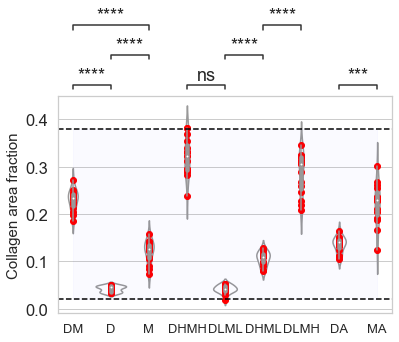

In [3]:
os.chdir(root_directory)
x_data = np.array(['DM','D', 'M', 'DHMH', 'DLML', 'DHML', 'DLMH', 'DA', 'MA'])
y_data = np.array([DM, D, M, DHMH, DLML, DHML, DLMH, DA, MA])

y_data = np.transpose(y_data)
y_mean = np.mean(y_data, axis=0)

sns.set_theme(style="whitegrid", font_scale=1.5)
ax = sns.violinplot(data=y_data, color="white")
ax.set_xticklabels(x_data,fontsize=13)
ax.set_ylabel("Collagen area fraction",fontsize=15)

for i in range(len(DM)):
    plt.scatter(x=range(len(y_mean)),y=y_data[:][i], c="red")

    
ax.set(ylim=(-0.01, 0.45))
upper_th = 0.38
lower_th = 0.02
# Fill in area under the curve and the horizontal lines
ax.fill_between(x=x_data, y1=upper_th, y2=lower_th, color='blue',  interpolate=True, alpha=.02)

# Horizontal lines
ax.axhline(upper_th, linestyle='--', color='black', label="upper_th: 0.5")
ax.axhline(lower_th, linestyle='--', color='black', label='lower_th: - 0.5')


# statistical analysis using statannot package (https://github.com/webermarcolivier/statannot)
x_data1 = [x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data]
x_data1 = np.ravel(x_data1)
y_data1 = np.ravel(y_data)

df1 = pd.DataFrame({'x':x_data1, 'y':y_data1})

x = "x"
y = "y"

order =  ['DM','D', 'M', 'DHMH', 'DLMH', 'DHML', 'DLML', 'DA', 'MA']

add_stat_annotation(ax, data=df1, x=x, y=y, order=order,
                    box_pairs=[("DM", "D"),("DM", "M"), ("D", "M"), ("DHMH", "DLMH"), ("DLMH", "DHML"), ("DHML", "DLML"), ("DA", "MA")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

    
plt.savefig("Collagen_violin.png", dpi=300, bbox_inches='tight')
plt.show()

### Generating output to study the effect of fibroblasts TGF-β uptake (DAU and MAU)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

D v.s. DA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.340e-05 U_stat=0.000e+00
DA v.s. DAU: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.350e-05 U_stat=0.000e+00
M v.s. MA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.724e-05 U_stat=9.000e+00
MA v.s. MAU: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.025e+02


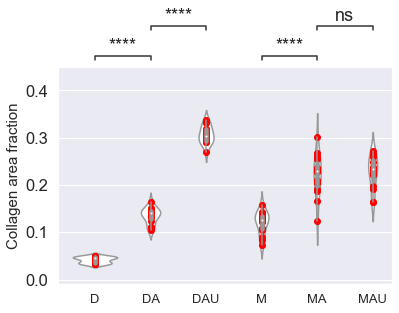

In [4]:
x_data = np.array(['D','DA', 'DAU', 'M', 'MA', 'MAU'])
y_data = np.array([D, DA, DAU, M, MA, MAU])

y_data = np.transpose(y_data)
y_mean = np.mean(y_data, axis=0)

sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.5)
ax = sns.violinplot(data=y_data, color="white")
ax.set_xticklabels(x_data,fontsize=13)
ax.set_ylabel("Collagen area fraction",fontsize=15)

for i in range(len(D)):
    plt.scatter(x=range(len(y_mean)),y=y_data[:][i], c="red")

ax.set(ylim=(-0.01, 0.45))
# statistical analysis using statannot package (https://github.com/webermarcolivier/statannot)
x_data1 = [x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data, x_data]
x_data1 = np.ravel(x_data1)
y_data1 = np.ravel(y_data)

df1 = pd.DataFrame({'x':x_data1, 'y':y_data1})

x = "x"
y = "y"

order =  ['D','DA', 'DAU', 'M', 'MA', 'MAU']

add_stat_annotation(ax, data=df1, x=x, y=y, order=order,
                    box_pairs=[("D", "DA"),("DA", "DAU"), ("M", "MA"), ("MA", "MAU")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

    
plt.savefig("Collagen_violin_with_fibroblast_uptake.png", dpi=300, bbox_inches='tight')
plt.show()
